# Import libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions.tools import load_json

# Import RAW data with description

In [17]:

data = load_json('../data/train/train_descripcion_accents.json')
# Now cast data to a DataFrame
df = pd.DataFrame(data)
print(df.shape)
df.head()

(50099, 5)


,id_oferta,categoria,subcategoria,descripcion_oferta,id_puesto_esco_ull
0,ef5a8ae0a743018628df9bd53893bb,Administracion de empresas,Administracion,Empresa de caracter internacional solicita adm...,1634
1,47137c06a640348ca4cb7dcbf938b1,Sanidad y salud,Medicina general,Las funciones a desempenar son las propias del...,611
2,cdfb72672340819a6721db72eee187,Comercial y ventas,Comercial,Buscamos persona para puesto de Chofer -Repart...,2825
3,5746210e854264aaca9452f4d377a4,Ventas al detalle,Venta al detalle,Abrimos proceso de seleccion para dependiente ...,1984
4,8a1bda0c91438bb4133f32e392a1ce,Ventas al detalle,Venta al detalle,Tus funciones principales seran: - Atencion a...,1984


# Get the words and count of them in the full dataframe

In [18]:
from functions.descripcion import clean_descripcion
df = clean_descripcion(df)

In [19]:
# Now cast id_puesto_esco_ull to int (delete the comma and the number after it)
df['id_puesto_esco_ull'] = df['id_puesto_esco_ull'].astype(int)
df.head()

,id_oferta,categoria,subcategoria,descripcion_oferta,id_puesto_esco_ull,descripcion_oferta_words
0,ef5a8ae0a743018628df9bd53893bb,Administracion de empresas,Administracion,Empresa de caracter internacional solicita adm...,1634,"[empresa, de, caracter, internacional, solicit..."
1,47137c06a640348ca4cb7dcbf938b1,Sanidad y salud,Medicina general,Las funciones a desempenar son las propias del...,611,"[las, funciones, a, desempenar, son, las, prop..."
2,cdfb72672340819a6721db72eee187,Comercial y ventas,Comercial,Buscamos persona para puesto de Chofer -Repart...,2825,"[buscamos, persona, para, puesto, de, chofer, ..."
3,5746210e854264aaca9452f4d377a4,Ventas al detalle,Venta al detalle,Abrimos proceso de seleccion para dependiente ...,1984,"[abrimos, proceso, de, seleccion, para, depend..."
4,8a1bda0c91438bb4133f32e392a1ce,Ventas al detalle,Venta al detalle,Tus funciones principales seran: - Atencion a...,1984,"[tus, funciones, principales, atencion, al, cl..."


In [20]:
from functions.descripcion import create_words_count_fulldataset
words_dict = create_words_count_fulldataset(df)

In [21]:
from functions.descripcion import create_words_count_groupdataset
words_group_dict = create_words_count_groupdataset(df)

In [22]:
# Get a list of words which is the spanish and english stopword from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('spanish')
stop_words.extend(stopwords.words('english'))

In [23]:
from functions.descripcion import filter_stop_words
words_dict = filter_stop_words(words_dict, stop_words)

In [24]:
from functions.descripcion import filter_stop_words_grouped
words_group_dict = filter_stop_words_grouped(words_group_dict, stop_words)

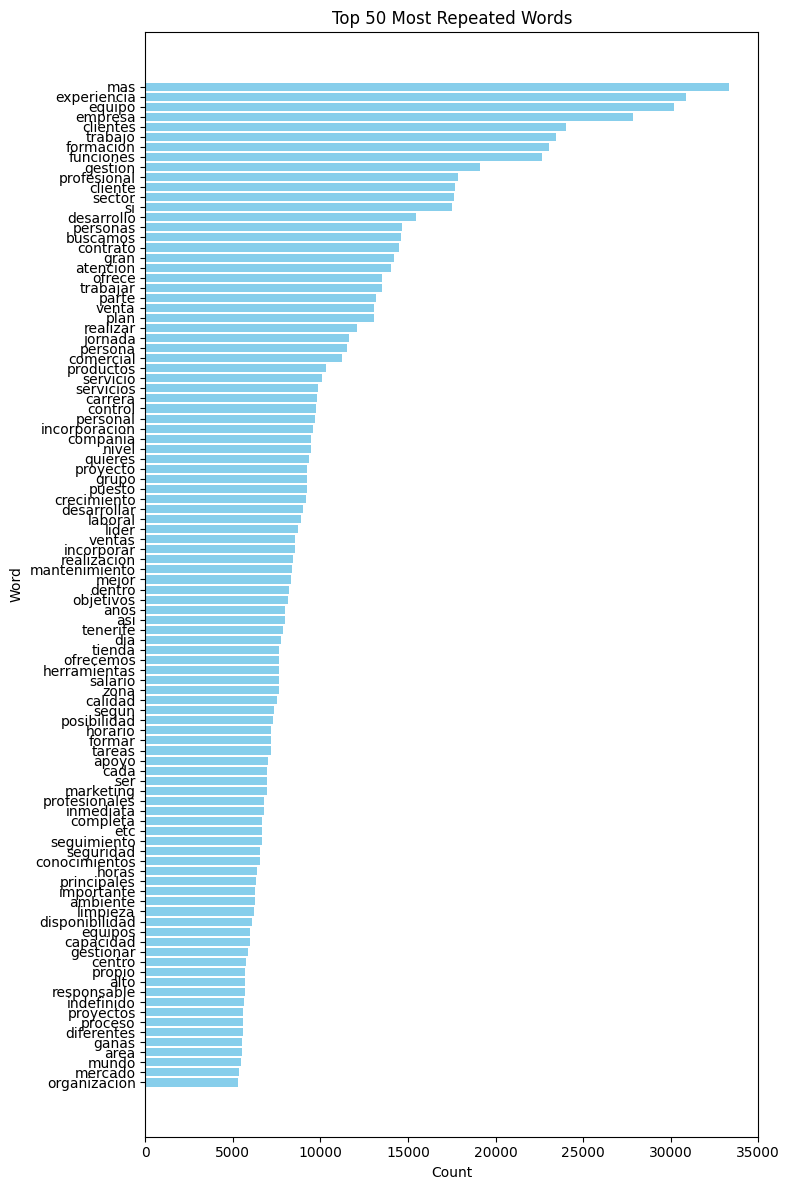

In [25]:
from functions.descripcion import plot_words_count
plot_words_count(words_dict, 100)

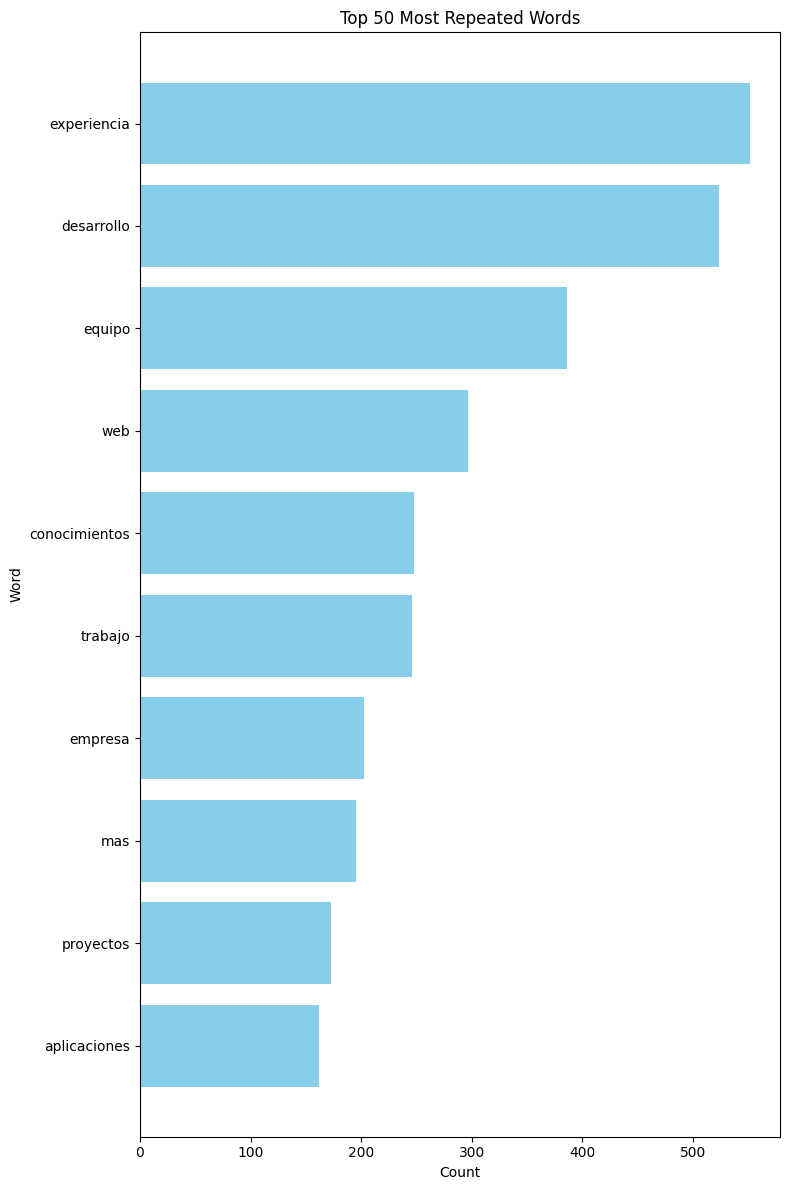

In [11]:
# from functions.descripcion import plot_words_count_grouped
def plot_words_count_grouped(words_group, id, N=50):
    try:
        plot_words_count(words_group[id], N)
    except:
        print('The id ' + str(id) + ' is not in the dataset')
plot_words_count_grouped(words_group_dict, 941, 10)

In [15]:
def create_palabras_empleto_texto_column(df, words_dict):
    palabras_empleo_texto = []
    for words_list in df['descripcion_oferta_words'][0:1]:
        actual_words = []
        for word in words_list:
            if word in words_dict:
                actual_words.append(word)
        palabras_empleo_texto.append(' '.join(actual_words))
        

create_palabras_empleto_texto_column(df)


['empresa', 'de', 'caracter', 'internacional', 'solicita', 'administrativo', 'a', 'para', 'el', 'area', 'de', 'operaciones', 'logistica', 'para', 'el', 'turno', 'de', 'tarde', 'de', 'a', 'imprescindible', 'dominio', 'alto', 'del', 'ingles', 'y', 'manejo', 'de', 'navision', 'business', 'central', 'conocimientos', 'de', 'ingles', 'avanzado', 'y', 'manejo', 'avanzado', 'de', 'microsoft', 'dynamics', 'navision', 'business', 'central', 'manejo', 'del', 'paquete', 'office']
